<h1><center>Wine Quality -- Red Wine</center></h1>
1. This work is to predict wine quality with [Wine Quality Data Set on UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality) and more detail about the dataset can be found in [reference](http://www3.dsi.uminho.pt/pcortez/wine/). 
2. The target variable is the grade of wine in a scale that ranges from 0 to 10.
3. The feature variables are 11 physicochemical properties of the wine, such as pH, alcohol, density, etc. 
4. I used progression models (Linear Regression and Support Vector Regression) to predict the grade of wine, and the models were evaluated with the Regression Error Characteristic (REC). 

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# import plotly.plotly as py
# import plotly.graph_objs as go
# import cufflinks as cf
# cf.go_offline()

## 2. Read data

In [4]:
red = pd.read_csv('winequality-red.csv', sep=';')

In [5]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 3. Data exploratory analysis

### 3.1 Check missing values

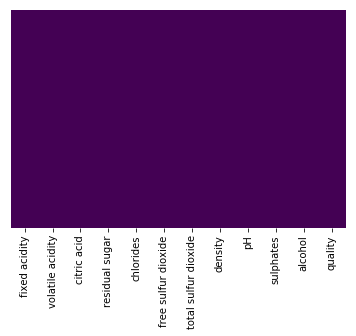

In [8]:
sns.heatmap(red.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### 3.2 Feature variables correlations

In [9]:
features = red.columns[:-1]
X = red[features]

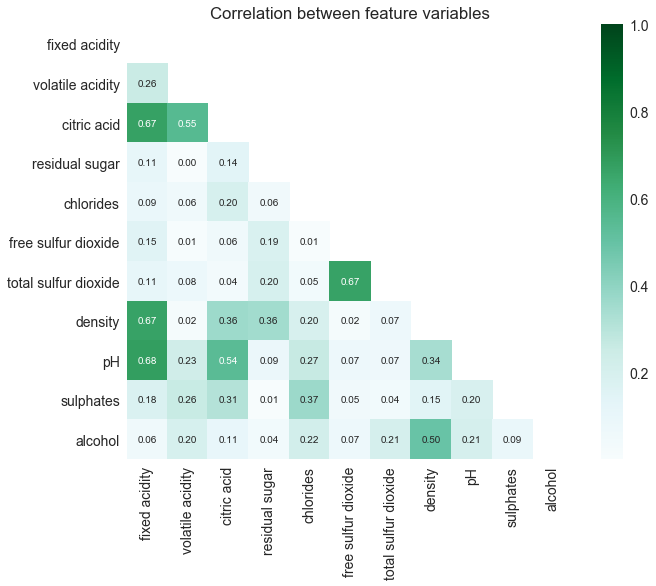

In [10]:
Xcorr = X.corr().abs()
mask = np.zeros_like(Xcorr)
mask[np.triu_indices_from(mask)] = True

#cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
with sns.axes_style("white"): 
    ax = sns.heatmap(Xcorr, mask=mask, cmap='BuGn', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation between feature variables")

plt.show()

<h5>What we find:</h5>
1. The feature correlation coefficients are lower than 0.7. 
2. The feature variables are not highly correlated, so keep all the features for now.

### 3.3 Target variable distribution

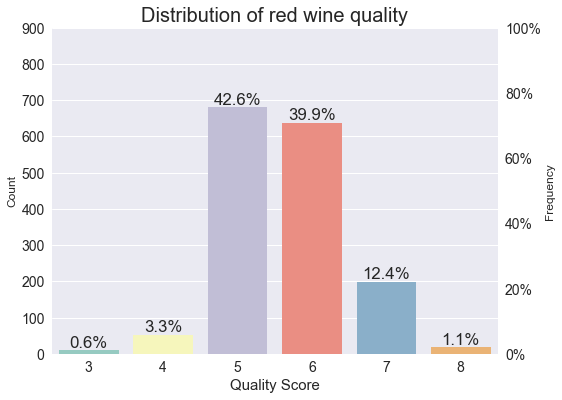

In [11]:
ncount = len(red['quality'])

sns.set_style("dark")
plt.figure(figsize=(8,6))

ax = sns.countplot(x='quality', data=red, palette="Set3")
plt.title('Distribution of red wine quality', fontsize=20)
plt.xlabel('Quality Score', fontsize=15)
ax.set_ylim(0,900)
ax.set_ylabel('Count', fontsize=12)
ax.grid('on', axis='y', color='w')

ax2=ax.twinx()
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_ylim(0,100)
fmt = '%.0f%%'
yticks = matplotlib.ticker.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

<h5>What we find:</h5>
1. Target variable has a normal distribution, with more normal scores than extrem scores.
2. Base on the distribution, I will use regression model which will preseve the order of the scores. 

## 4. Data preprocessing pipeline

### 4.1 Remove low variance feature and scale feature variables

In [12]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
pre_pipe = Pipeline([("lowVar", VarianceThreshold(0.0)), 
                     ("scaler", StandardScaler())])

In [14]:
pre_pipe.steps

[('lowVar', VarianceThreshold(threshold=0.0)),
 ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]

In [15]:
X1 = pre_pipe.fit_transform(X)

In [16]:
print(X1.shape)

(1599, 11)


In [17]:
X1.var(axis=0) ## check the scale data variance

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

<h5>What we did:</h5>
1. All the feature feature variables are kept for ML models. 
2. Feature varibale are scaled to unit variance.

## 5. Regression model evaluation
1. The regression performance is commonly measured by an error metric, such as:
    <ul> 
    <li> mean_absolute_error</li> $MAE =\frac{1}{m} \sum_{i=0}^{m-1} |y_{true_i} - y_{pred_i}|$
    <li> mean_squared_error</li>  $MSE =\frac{1}{m} \sum_{i=0}^{m-1} (y_{true_i} - y_{pred_i})^2$
    </ul>
2. In this project, I will use the MAE as the evaluation metric. Since a model that predicts 4 for the true grade of 3 is better than one that predicts 7. 
3. The regression error characteristic (REC) curve will also be used to compare regression models. The curve plots the absolute error tolerance (x-axis) versus accuracy within the tolerance (y-axis).

### 5.1 REC function

In [18]:
## REC function will be used as the model evaluation metric
def REC(y_true, y_pred, error_start=0.0, error_interval = 0.25):
    """
    This function can be used for Regression Error Characteristic (REC) curves.
    args: y_true, y_pred, error_tolerance start (default=0.0), error_tolerance interval (default=0.2)
    
    returns: dictionary of epsilon array and the corresponding accuracy list            
    """
    
    n_sample = len(y_true) # the number of samples
    errors = abs(np.array(y_true) - y_pred) # "absolute error", could change to "squared error"
    error_end = errors.max() # take the maximum error as the end value of epsilon range
    
    # the list of epislon -- the x-axis of REC plot
    epsilon = np.arange(error_start, error_end, error_interval)
    
    n_correct = []
    accuracy = []
    for num in epsilon:
        for i in range(n_sample):
            if errors[i] <= num: 
                n_correct.append(i)
        accuracy.append(len(n_correct)/n_sample)
        n_correct = []

    return {"Epsilon": epsilon, "Accuracy": accuracy}

### 5.2  split data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y = red['quality'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

### 5.3 Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

In [22]:
## build a pipeline to select the best number of features for Linear Regression model
lrg_pipe = Pipeline([
    ("select_features", SelectKBest()),
    ("regression", LinearRegression())
])

In [23]:
lrg_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'select_features', 'regression', 'select_features__k', 'select_features__score_func', 'regression__copy_X', 'regression__fit_intercept', 'regression__n_jobs', 'regression__normalize'])

In [24]:
n_features_options = [2, 4, 6, 8, 10]

In [25]:
## grid search for the best number of features and feature selection method
param_grid = {
    "select_features__k": n_features_options,
    "select_features__score_func": [f_regression, mutual_info_regression]
}

In [26]:
lrg_pipe_grid = GridSearchCV(lrg_pipe, cv=3, param_grid=param_grid)

In [27]:
lrg_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=10, score_func=<function f_classif at 0x000001AFAF43BF28>)), ('regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'select_features__k': [2, 4, 6, 8, 10], 'select_features__score_func': [<function f_regression at 0x000001AFAF444158>, <function mutual_info_regression at 0x000001AFAF51AE18>]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
lrg_pipe_grid.best_params_

{'select_features__k': 4,
 'select_features__score_func': <function sklearn.feature_selection.mutual_info_.mutual_info_regression>}

In [29]:
selector_labels = ["f_regression", "mutual_info_regression"]
lrg_mean_scores = lrg_pipe_grid.cv_results_['mean_test_score']

lrg_mean_scores = lrg_mean_scores.reshape(len(n_features_options), len(selector_labels))
lrg_mean_scores = pd.DataFrame(lrg_mean_scores, columns=selector_labels, 
                               index=n_features_options)
lrg_mean_scores.index.name = "n_features"

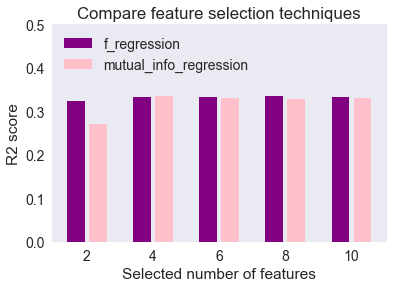

In [30]:
bar_offsets = (np.arange(len(n_features_options)) * (len(selector_labels) + 1) + .5)
colors = ["purple", "pink"]

plt.figure()
for i, column in enumerate(lrg_mean_scores):
    plt.bar(bar_offsets+i, list(lrg_mean_scores[column]), label=column, color = colors[i])
    
plt.title("Compare feature selection techniques")
plt.xlabel("Selected number of features")
plt.ylabel("R2 score")
plt.xticks(bar_offsets+0.5, n_features_options)
plt.ylim(0, 0.5)
plt.legend(loc="upper left")

plt.show()

In [31]:
lrg_mean_scores

,f_regression,mutual_info_regression
n_features,,
2,0.322735,0.270067
4,0.333483,0.336277
6,0.333651,0.330879
8,0.335493,0.329376
10,0.332053,0.331664


<h5>What we find:</h5>
1. The best number of features for Linear Regression is 4 from mutual-information feature selective method. 

### 5.4 Suppot Vector Machine Regression

In [32]:
from sklearn.svm import SVR

In [33]:
svr_pipe = Pipeline([
    ("select_features", SelectKBest()),
    ("regression", SVR())
])

In [34]:
svr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'select_features', 'regression', 'select_features__k', 'select_features__score_func', 'regression__C', 'regression__cache_size', 'regression__coef0', 'regression__degree', 'regression__epsilon', 'regression__gamma', 'regression__kernel', 'regression__max_iter', 'regression__shrinking', 'regression__tol', 'regression__verbose'])

In [35]:
## grid search parameters for svr and feature selection
param_svr = {
    "select_features__k": n_features_options,
    "select_features__score_func": [f_regression, mutual_info_regression],
    "regression__C": [0.1, 1, 10, 20],
    "regression__kernel":["linear", "poly", "rbf"]
}

In [36]:
svr_pipe_grid = GridSearchCV(estimator=svr_pipe, param_grid=param_svr, cv=3)

In [37]:
svr_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=10, score_func=<function f_classif at 0x000001AFAF43BF28>)), ('regression', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'select_features__k': [2, 4, 6, 8, 10], 'select_features__score_func': [<function f_regression at 0x000001AFAF444158>, <function mutual_info_regression at 0x000001AFAF51AE18>], 'regression__C': [0.1, 1, 10, 20], 'regression__kernel': ['linear', 'poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
svr_pipe_grid.best_params_

{'regression__C': 1,
 'regression__kernel': 'rbf',
 'select_features__k': 10,
 'select_features__score_func': <function sklearn.feature_selection.mutual_info_.mutual_info_regression>}

## 6 Model comparison and prediction

### 6.1 Evaluation metric - regression REC

In [39]:
## Linear regression model
lrg_estimator = lrg_pipe_grid.best_estimator_ ## use the best estimator to predict
y_train_lrg= cross_val_predict(lrg_estimator, X_train, y_train, cv=10)
print("R2 score of linear regression is %f" %(r2_score(y_train, y_train_lrg)))

## REC dataframe for later model comparision
rec_lrg = REC(y_train, y_train_lrg)
rec_lrg = pd.DataFrame(rec_lrg)

R2 score of linear regression is 0.335424


In [40]:
## SVR
svr_estimator = svr_pipe_grid.best_estimator_
y_train_svr = cross_val_predict(svr_estimator, X_train, y_train, cv=10)
print("R2 score of SVR is %f" %(r2_score(y_train, y_train_svr)))

rec_svr = REC(y_train, y_train_svr)
rec_svr = pd.DataFrame(rec_svr)

R2 score of SVR is 0.393094


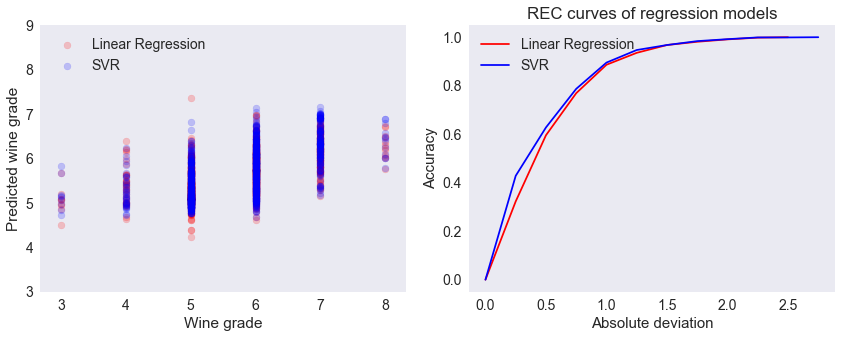

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].scatter(y_train, y_train_lrg, color="red", alpha=0.2, label="Linear Regression")
axes[0].scatter(y_train, y_train_svr, color="blue", alpha=0.2, label="SVR")

axes[0].set_xlabel("Wine grade")
axes[0].set_ylabel("Predicted wine grade")
axes[0].set_ylim(3, 9)
axes[0].legend(loc="upper left")

axes[1].plot(rec_lrg["Epsilon"], rec_lrg["Accuracy"], label="Linear Regression", color="red")
axes[1].plot(rec_svr["Epsilon"], rec_svr["Accuracy"], label="SVR", color="blue")

axes[1].set_xlabel("Absolute deviation", fontsize=15)
axes[1].set_ylabel("Accuracy", fontsize=15)
axes[1].set_title("REC curves of regression models")
axes[1].legend(loc="upper left")


fig.tight_layout()
plt.show()

In [42]:
rec_lrg.loc[1:4].set_index("Epsilon").join(rec_svr.loc[1:4].set_index("Epsilon"), 
                                           lsuffix='_lrg', rsuffix='_svr')

,Accuracy_lrg,Accuracy_svr
Epsilon,,
0.25,0.322609,0.428061
0.50,0.595174,0.627346
0.75,0.768543,0.786416
1.00,0.885612,0.894549


<h5>What we find:</h5>
1. Suppot Vector Regression peforms better than Linear Regression with absolute error tolerances less than 1.0. 
2. On abosulte error tolerance of 1.0, SVR has prediction accuracy of 89.45% using 10 feature variables. But linear regression can achieve accuracy of 88.56% using only 4 feature variables. 

### 6.2 Evaluation metric - classification
1. We can also use classification evaluation metric to check the prediction performance. 
2. For the continuous output, the predicted class $p_i = y_i$, if $|y_i - y_{pred_i}| <= Error Tolerance$; else, $p_i = round(y_{pred_i})$.
3. Classification report and confusion matrix are used.

In [43]:
def y_pred_within_tolerance (y_true, y_pred, tolerance):
    """
    This function converts the predicted wine grade to integer taking into account of error tolerance. 
    If y_true - y_pred <= tolerance, then the predicted wine grade is y_true;
    If y_true - y_pred > tolerance, then the predicted wine grade is the nearese integer of y_pred.
    """
    grade_tolerance = []
    y_true = np.array(y_true)
    
    for i in range(len(y_true)):
        if y_true[i] - y_pred[i] <= tolerance:
            grade_tolerance.append(int(y_true[i]))
        else:
            grade_tolerance.append(int(round(y_pred[i])))
    return grade_tolerance

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
## absolute error is 1.0, and using the best SVR model
y_pred_t1_svr = y_pred_within_tolerance(y_train, y_train_svr, 1.0) 

print(confusion_matrix(y_train.astype(int), y_pred_t1_svr))
print("\n")
print(classification_report(y_train.astype(int), y_pred_t1_svr))

[[  9   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 486   0   0   0]
 [  0   0  17 421   0   0]
 [  0   0  10  21 107   0]
 [  0   0   0   8   4   0]]


             precision    recall  f1-score   support

          3       1.00      1.00      1.00         9
          4       1.00      1.00      1.00        36
          5       0.95      1.00      0.97       486
          6       0.94      0.96      0.95       438
          7       0.96      0.78      0.86       138
          8       0.00      0.00      0.00        12

avg / total       0.94      0.95      0.94      1119



C:\Users\futong\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 7. Prediction on test data

In [46]:
y_pred = svr_estimator.predict(X_test)

In [47]:
print("R2 score of SVR prediction is %f" %(r2_score(y_test, y_pred)))

R2 score of SVR prediction is 0.411116


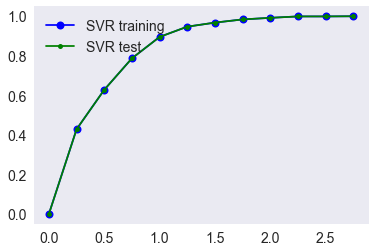

In [48]:
## Plot the REC curve
rec_pred = REC(y_test, y_pred)
rec_pred = pd.DataFrame(rec_svr)

p1 = plt.plot(rec_svr["Epsilon"], rec_svr["Accuracy"], label="SVR training", color="blue", 
              marker='o', markersize=8)
p2 = plt.plot(rec_pred["Epsilon"], rec_pred["Accuracy"], label="SVR test", color="green", 
             marker='o', markersize=5)

plt.legend(loc="upper left")
plt.show()

In [49]:
y_pred_t_1 = np.array(y_pred_within_tolerance(y_test, y_pred, 1))

print(confusion_matrix(y_test.astype(int), y_pred_t_1))
print("\n")
print(classification_report(y_test.astype(int), y_pred_t_1))

[[  1   0   0   0   0   0]
 [  0  17   0   0   0   0]
 [  0   0 195   0   0   0]
 [  0   0   2 198   0   0]
 [  0   0   1  10  50   0]
 [  0   0   0   2   4   0]]


             precision    recall  f1-score   support

          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00        17
          5       0.98      1.00      0.99       195
          6       0.94      0.99      0.97       200
          7       0.93      0.82      0.87        61
          8       0.00      0.00      0.00         6

avg / total       0.95      0.96      0.95       480



C:\Users\futong\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h5>What we find:</h5>
1. The SVR model has very low variance between training and test dataset.

## 8. Feature importance

In [50]:
mi = mutual_info_regression(X1, y)
mi = pd.DataFrame(mi, index=X.columns, columns=["MI"]).sort_values(by="MI", ascending=False)

## F-score is used here for comparison
f, p = f_regression(X1, y)
fscore = pd.DataFrame(f, columns=["F score"], index=X.columns).sort_values(by="F score", 
                                                                           ascending=False)

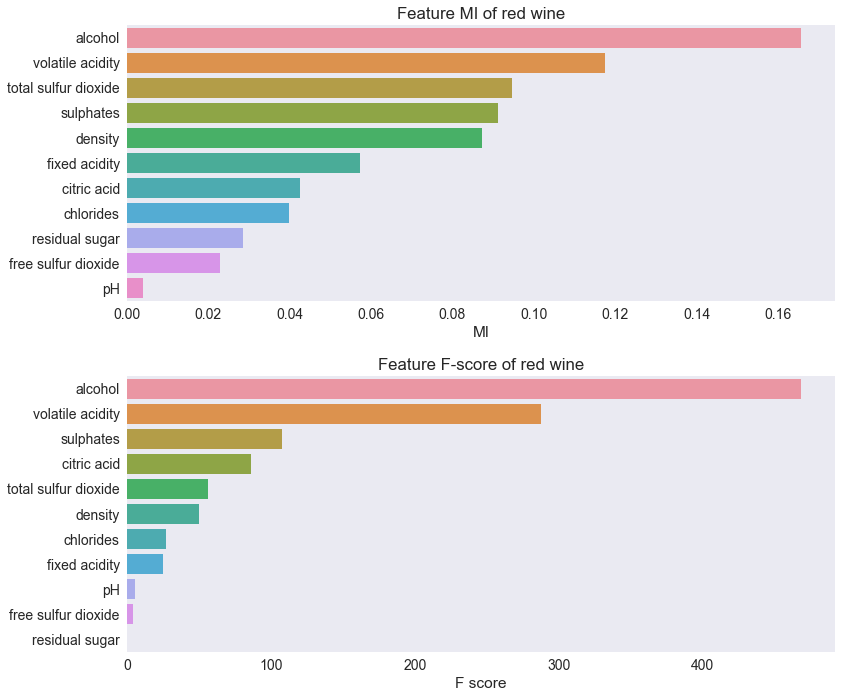

In [51]:
figure, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.barplot(x="MI", y=mi.index, data=mi, ax=axs[0])
axs[0].set_title("Feature MI of red wine")

sns.barplot(x="F score", y=fscore.index, data=fscore, ax=axs[1])
axs[1].set_title("Feature F-score of red wine")

figure.tight_layout()
plt.show()

<h5>What we find:</h5>
1. The top 4 relavant features are: alcohol, volatile acidity, total sulfur dioxide, and suplphates.
2. The least 3 relavant features are pH, free sulfur dioxide, and residual sugar. 